In [1]:
import numpy as np  #Importa libreria numerica 
import sympy as sym #simbolica
import matplotlib.pyplot as plt #importa matplotlib solo pyplot
import matplotlib.image as mpimg 
from sympy.plotting import plot  #para plotear 2 variables
from sympy.plotting import plot3d  # para 3
from sympy.plotting import plot3d_parametric_surface
import ipympl  #Para importar gestor de imagenes 
sym.init_printing() #activa a jupyter para mostrar simbolicamente el output
%matplotlib widget


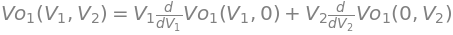

\operatorname{Vo_{1}}{\left(V_{1},V_{2} \right)} = V_{1} \frac{d}{d V_{1}} \operatorname{Vo_{1}}{\left(V_{1},0 \right)} + V_{2} \frac{d}{d V_{2}} \operatorname{Vo_{1}}{\left(0,V_{2} \right)}


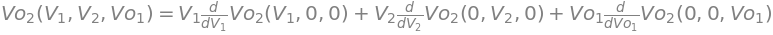

\operatorname{Vo_{2}}{\left(V_{1},V_{2},Vo_{1} \right)} = V_{1} \frac{d}{d V_{1}} \operatorname{Vo_{2}}{\left(V_{1},0,0 \right)} + V_{2} \frac{d}{d V_{2}} \operatorname{Vo_{2}}{\left(0,V_{2},0 \right)} + Vo_{1} \frac{d}{d Vo_{1}} \operatorname{Vo_{2}}{\left(0,0,Vo_{1} \right)}


In [4]:
V1, V2, VD, VC = sym.symbols('V_1, V_2, V_D, V_C')
R1, R2, R3, R4, R5, R = sym.symbols('R1, R2, R3, R4, R5, R')
# Se analiza aprovechando la linealidad y el principio de la superposición, 
# analizando cada variable pasivando las otras.

Vo1 = sym.Function('Vo_1')(V1,V2)
Vo2 = sym.Function('Vo_2')(V1,V2,Vo1)

eq_Vo1=sym.Eq(Vo1,(sym.diff(Vo1.subs(V2,0),V1))*V1+(sym.diff(Vo1.subs(V1,0),V2)*V2))
display(eq_Vo1)

sym.print_latex(eq_Vo1)

Vo1 = sym.Symbol('Vo_1')
Vo2 = sym.Function('Vo_2')(V1,V2,Vo1)
eq_Vo2 = sym.Eq(Vo2,(sym.diff(Vo2.subs({V2:0,Vo1:0}),V1)*V1
                    +sym.diff(Vo2.subs({V1:0,Vo1:0}),V2)*V2
                    +sym.diff(Vo2.subs({V1:0,V2:0}),Vo1)*Vo1))
display(eq_Vo2)
sym.print_latex(eq_Vo2)

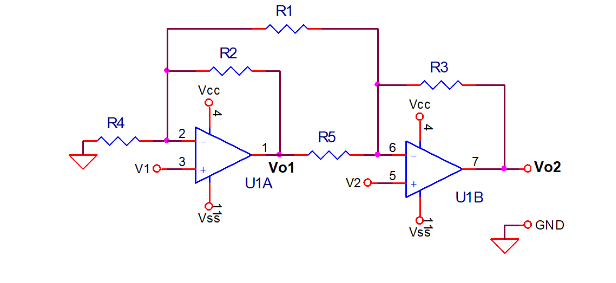

In [5]:
from IPython.display import Image 
Image(filename='CI.png',width=600)  

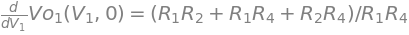

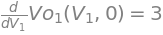

In [9]:
# "Se utiliza la LKC para encontrar las derivadas paciales" 

#Ecueciones
#V1(G4+G2+G1)-Vo_1*G2=0 
eq_0=sym.Eq(V1*(1/R1+1/R2+1/R4)-eq_Vo1.lhs.subs(V2,0)*1/R2)
display(eq_0)

eq_Vo1_V1=sym.Eq(eq_Vo1.lhs.subs(V2,0),sym.apart((V1*(1/R1+1/R2+1/R4)*R2),V1))
display(eq_Vo1_V1)

eq_dVo1_V1=sym.Eq(sym.diff(eq_Vo1_V1.lhs,V1),sym.diff(eq_Vo1_V1.rhs,V1))
display(eq_dVo1_V1)

display(eq_dVo1_V1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

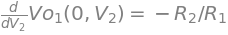

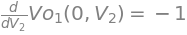

In [10]:
eq_1=sym.Eq(V2*(1/R1)+eq_Vo1.lhs.subs(V1,0)*1/R2)
display(eq_1)

eq_Vo1_V2=sym.Eq(eq_Vo1.lhs.subs(V1,0),sym.apart(-(V2*(1/R1)*R2),V2))
display(eq_Vo1_V2)

eq_dVo1_V2=sym.Eq(sym.diff(eq_Vo1_V2.lhs,V2),sym.diff(eq_Vo1_V2.rhs,V2))
display(eq_dVo1_V2)

display(eq_dVo1_V2.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

In [11]:
print("Remplazando")
eq_Vo1=sym.Eq(eq_Vo1.lhs,(eq_Vo1_V1.rhs+eq_Vo1_V2.rhs))
display(eq_Vo1)
eq_Vo1_R=sym.Eq(eq_Vo1.lhs,(eq_Vo1.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
display(eq_Vo1_R)

Remplazando


In [12]:
#Plot 3D y guarda /tmp/Vo1__V1_V2.png
plt=plot3d_parametric_surface( V1, V2, eq_Vo1_R.rhs, (V1, -10,10),(V2, -10,10),
                              show=False, title="%s = %s"%(str(eq_Vo1_R.lhs),str(eq_Vo1_R.rhs)),
                              xlabel="V1", ylabel="V2")
plt.show()
plt.save("./plot/Vo1__V1_V2.png")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

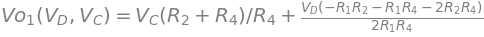

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
Vo1 = sym.Function('Vo_1')(VD,VC)
eq_Vo1_Vcd=sym.Eq(Vo1,sym.collect(sym.apart((eq_Vo1.rhs).subs({V1:(VC-(VD/2)),V2:(VC+(VD/2))}),VC),VD))
display(eq_Vo1_Vcd)
eq_Vo1_Vcd_R=sym.Eq(Vo1,(eq_Vo1_Vcd.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
display(eq_Vo1_Vcd_R)

plt=plot3d(eq_Vo1_Vcd_R.rhs, (VD, -10,10),(VC, -11,11),
           title="%s = %s"% (str(eq_Vo1_Vcd_R.lhs),str(eq_Vo1_Vcd_R.rhs)),
           xlabel="VD", ylabel="VC",show=False)
plt.show()
plt.save("./plot/Vo1__VD_VC.png")


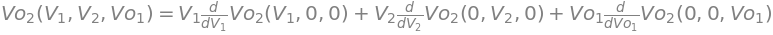

In [14]:
Vo1 = sym.Symbol('Vo_1')
Vo2 = sym.Function('Vo_2')(V1,V2,Vo1)
eq_Vo2 = sym.Eq(Vo2,(sym.diff(Vo2.subs({V2:0,Vo1:0}),V1)*V1
                    +sym.diff(Vo2.subs({V1:0,Vo1:0}),V2)*V2
                    +sym.diff(Vo2.subs({V1:0,V2:0}),Vo1)*Vo1))
display(eq_Vo2)

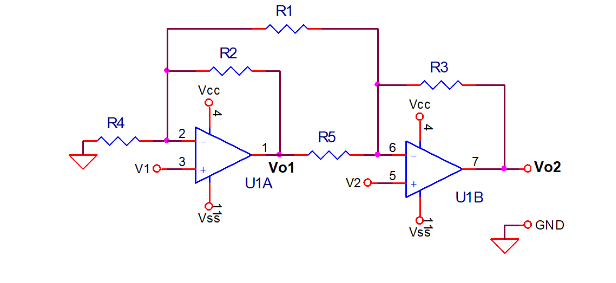

In [21]:
from IPython.display import Image 
Image(filename='CI.png',width=600)  

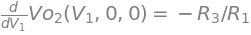

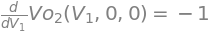

In [15]:
#Eq: V1=0
Vo1 = sym.Symbol('Vo_1')
Vo2 = sym.Function('Vo_2')(V1,V2,Vo1)

eq_0=sym.Eq(V1*(1/R1)+eq_Vo2.lhs.subs({V2:0, Vo1:0})*1/R3)
display(eq_0)
eq_Vo2_V1=sym.Eq(eq_Vo2.lhs.subs({V2:0, Vo1:0}),sym.apart((V1*(1/R1)*-R3),V1))
display(eq_Vo2_V1)

eq_dVo2_V1=sym.Eq(sym.diff(eq_Vo2_V1.lhs,V1),sym.diff(eq_Vo2_V1.rhs,V1))
display(eq_dVo2_V1)

display(eq_dVo2_V1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

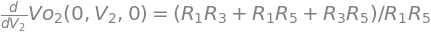

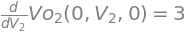

In [16]:
eq_1=sym.Eq(V2*(1/R1+1/R3+1/R5)-eq_Vo2.lhs.subs({V1:0,Vo1:0})*1/R3)
display(eq_1)
eq_Vo2_V2=sym.Eq(eq_Vo2.lhs.subs({V1:0,Vo1:0}),sym.apart((V2*(1/R1+1/R3+1/R5)*R3),V2))
display(eq_Vo2_V2)

eq_dVo2_V2=sym.Eq(sym.diff(eq_Vo2_V2.lhs,V2),sym.diff(eq_Vo2_V2.rhs,V2))
display(eq_dVo2_V2)

display(eq_dVo2_V2.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))


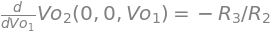

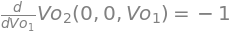

In [17]:
eq_2=sym.Eq(Vo1*(1/R2)+eq_Vo2.lhs.subs({V1:0,V2:0})*1/R3)
display(eq_2)
eq_Vo2_Vo1=sym.Eq(eq_Vo2.lhs.subs({V1:0,V2:0}),Vo1*-R3/R2)
display(eq_Vo2_Vo1)
eq_dVo2_Vo1=sym.Eq(sym.diff(eq_Vo2_Vo1.lhs,Vo1),sym.diff(eq_Vo2_Vo1.rhs,Vo1))
display(eq_dVo2_Vo1)
display(eq_dVo2_Vo1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

In [18]:
print("Remplazando")
eq_Vo2=sym.Eq(eq_Vo2.lhs,(eq_Vo2_V1.rhs+eq_Vo2_V2.rhs+eq_Vo2_Vo1.rhs))
display(eq_Vo2)
eq_Vo2_R=sym.Eq(eq_Vo2.lhs,(eq_Vo2.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
display(eq_Vo2_R)

Remplazando


Remplazando


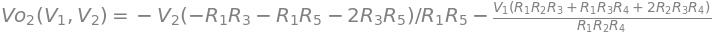

In [19]:
print("Remplazando")
eq_Vo2=eq_Vo2.subs(Vo1,eq_Vo1.rhs)
Vo2_ = sym.Function('Vo_2')(V1,V2)
eq_Vo2=sym.Eq(Vo2_,sym.collect(sym.apart(eq_Vo2.rhs,V1),V2))
display(eq_Vo2)
eq_Vo2_R=sym.Eq(eq_Vo2.lhs,(eq_Vo2.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
display(eq_Vo2_R)

In [20]:
#Plot 3D y guarda /tmp/Vo2__V1_V2.png
plt=plot3d_parametric_surface( V1, V2, eq_Vo2_R.rhs, (V1, -10,10),(V2, -10,10),
                              show=False, title="%s = %s"%(str(eq_Vo2_R.lhs),str(eq_Vo2_R.rhs)),
                              xlabel="V1", ylabel="V2")
plt.show()
plt.save("./plot/Vo2__V1_V2.png")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

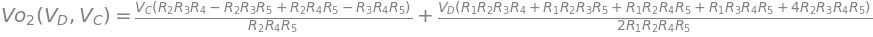

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
Vo2 = sym.Function('Vo_2')(VD,VC)
eq_Vo2_Vcd=sym.Eq(Vo2,sym.collect(sym.apart((eq_Vo2.rhs).subs({V1:-VD/2+VC,V2:+VD/2+VC}),VC),VD))
display(eq_Vo2_Vcd)
eq_Vo2_Vcd_R=sym.Eq(Vo2,(eq_Vo2_Vcd.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
display(eq_Vo2_Vcd_R)



plt=plot3d(eq_Vo2_Vcd_R.rhs, (VD, -10,10),(VC, -11,11),
           title="%s = %s"% (str(eq_Vo2_Vcd_R.lhs),str(eq_Vo2_Vcd_R.rhs)),
           xlabel="VD", ylabel="VC",show=False)
plt.show()
plt.save("./plot/Vo2__VD_VC.png")


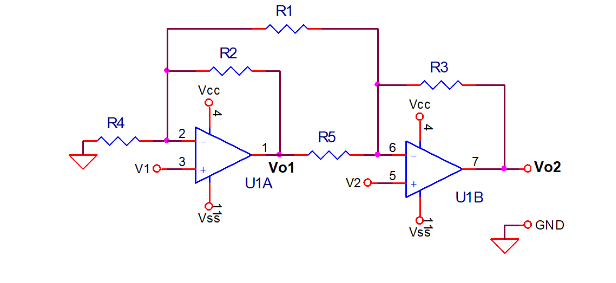

In [22]:
from IPython.display import Image 
Image(filename='CI.png',width=600)  

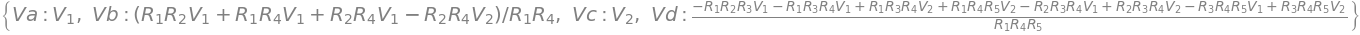

In [17]:
#Verifico
V1, V2, VD, VC = sym.symbols('V_1, V_2, V_D, V_C')
Va, Vb, Vc, Vd = sym.symbols('Va, Vb, Vc, Vd')
R1, R2, R3, R4, R5, R = sym.symbols('R1, R2, R3, R4, R5, R')
Vo1 = sym.Function('Vo_1')(V1,V2)
Vo2 = sym.Function('Vo_2')(V1,V2)
eq__0=sym.Eq(Va,V1)
eq__1=sym.Eq(Vc,V2)
eq__2=sym.Eq(Va*(1/R4+1/R2+1/R1)-Vb/R2-Vc/R1)
eq__3=sym.Eq(Vc*(1/R5+1/R1+1/R3)-Vb/R5-Va/R1-Vd/R3)
res=sym.solve([eq__0,eq__1,eq__2,eq__3],(Va,Vb,Vc,Vd))
display(res)

In [18]:
Vo2_=res[Vd].subs({R1:R,R2:R,R3:R,R4:R,R5:R})
display(sym.simplify(Vo2_))

In [19]:
Vo1_=res[Vb].subs({R1:R,R2:R,R3:R,R4:R,R5:R})
display(sym.simplify(Vo1_))